# Car Price Prediction

latihan membuat project dengan linear regression.


In [1]:
import numpy as np
import pandas as pd

## Data Preparation

In [140]:
df = pd.read_csv('D:\MLZoomcamp\module-2\data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


first need to cleaning to make it same lowercase or other, make it consistant

In [141]:
df.columns = df.columns.str.replace(' ', '_').str.lower()


In [142]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [143]:
df.head()


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [144]:
df.dtypes #tell types of column

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [145]:
df.dtypes == 'object'

make                  True
model                 True
year                 False
engine_fuel_type      True
engine_hp            False
engine_cylinders     False
transmission_type     True
driven_wheels         True
number_of_doors      False
market_category       True
vehicle_size          True
vehicle_style         True
highway_mpg          False
city_mpg             False
popularity           False
msrp                 False
dtype: bool

In [146]:
df.dtypes[df.dtypes == 'object'] #to keep up the columns that their types is object

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

make, model, etc, (columns) are index of the series while 

object, object, int64 are values

In [147]:
df.dtypes[df.dtypes == 'object'].index #to get accsess to the index

Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'],
      dtype='object')

In [148]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings #contain all the strings name of columns

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [149]:
#to replace the data to make it same with each other

for col in strings:
    df[col] = df[col].str.replace(' ', '_').str.lower()

In [150]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## Exploratory Data Analysis

In [151]:
#to checkthe unique value and how many unique value it has

for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

In [152]:
import matplotlib.pyplot
import seaborn as sns

%matplotlib inline 
#to make sure that allthe plot can displayed in the notebook

### distribution of prices

c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='msrp', ylabel='Count'>

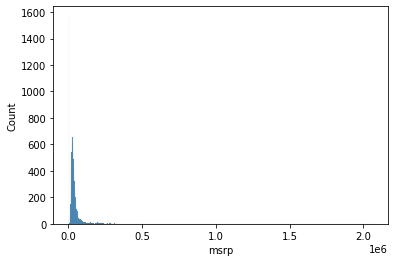

In [153]:
sns.histplot(df.msrp)

c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='msrp', ylabel='Count'>

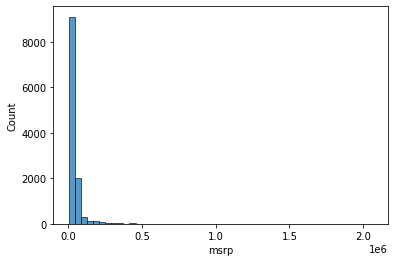

In [154]:
sns.histplot(df.msrp, bins = 50)

c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='msrp', ylabel='Count'>

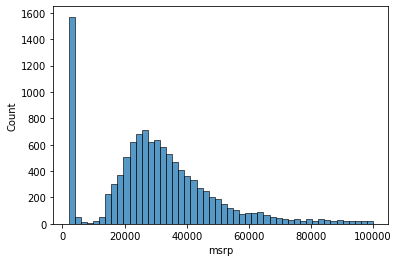

In [155]:
#zoom the plot because the distribution is long tail one
sns.histplot(df.msrp [df.msrp < 100000], bins=50)

In [156]:
np.log1p([0, 1, 10, 1000, 100000])

#it kinds brings very high values and make them lower

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [157]:
price_logs = np.log1p(df.msrp)

c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='msrp', ylabel='Count'>

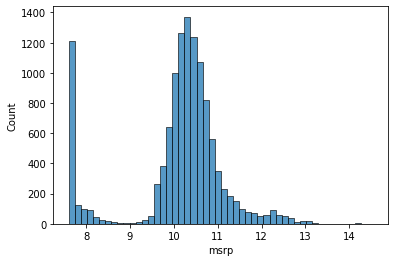

In [158]:
price_logs
sns.histplot(price_logs, bins=50)

the tail now is gone

### Missing Values

In [159]:
#count
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## Seeting up the validation framework

In [160]:
#will split 60, 20, 20 between data

n = len(df)

n_val = int(n* 0.2)
n_test = int(n* 0.2)
n_train = n - n_val - n_test

In [161]:
#check that it should be the same

n, n_val + n_test + n_train

(11914, 11914)

In [162]:
n_val, n_test, n_train

(2382, 2382, 7150)

In [163]:
#arbitrary sequence of number. it will return them in order (?)

df.iloc[[10, 0, 3, 5]]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
10,bmw,1_series,2013,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,39600
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
5,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,31200


In [164]:
df_train = df.iloc[n_train:]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val]

In [165]:
#to generate a sequence of number from one to n-1
idx = np.arange(n)

In [166]:
#to make it reproducible we usually set a random seed
np.random.seed(2)
np.random.shuffle(idx)

In [167]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [168]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [169]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [170]:
#reset index column

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [171]:
#use to make our feature matrix x but in df there's msrp
#msrp need to turn it to apply the log transformation

y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [172]:
#remove msrp  variable (tulisan)? agar kagak masuk ke model
#msrp tuh harga di data

del df_train['msrp']
del df_test['msrp']
del df_val['msrp']

In [173]:
len(y_train)

7150

## Linear Regression

In [174]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [175]:
#akan coba mengambil feature matrix beberapa seperti 
# engine_hp, city_mpg, popularity

xi =[453, 11, 86]

In [176]:
w0 = 0
w = [1,1,1]

In [177]:
#the function is based on notation of linear regression

def linear_regression(xi):
    n = len(xi)

    pred = w0

    for j in range(n):
        pred = pred + w[j] * xi[j]

    return pred

In [178]:
linear_regression(xi)

550

In [179]:
#contoh lain
xi =[453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]

linear_regression(xi)

12.312

In [180]:
#and so to get the price need to do exponent  - 1 because before
#only log(y+1)

np.exp(12.312) - 1 

#the -1 is to undo the +1 we did inside log

#or we can use

np.expm1(12.312)

222347.2221101062

So, 222347.2221101062 is the price for the car

In [181]:
#checking result of exponent to log again

np.log1p(222347.2221101062)

12.312

## Linear Regression Vector Form

### dot version

In [182]:
def dot(xi, w):
    n = len(xi)
    res = 0.0 #w0 (bias)

    for j in range(n):
        res = res + xi[j] * w[j]
    
    return res

In [183]:
def linear_regression(xi):
    return w0 + dot(xi, w)

### another version

In [184]:
w_new = [w0] + w
w_new

[7.17, 0.01, 0.04, 0.002]

In [185]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [186]:
linear_regression(xi)

12.312

### other example with 3 cars


In [187]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

In [188]:
#x1, x2, x10 are feature of matrix
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X= [x1, x2, x10]
X = np.array(X) #make it to array
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [189]:
# do multiplication of matrix
def linear_regression(X):
    return X.dot(w_new)

In [190]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

## Training a linear regression model

In [191]:
def train_linear_regression(X, y):
    pass

In [192]:

X= [
    [148, 24, 1385],
    [132, 25, 2031],
    [ 453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [ 413, 11, 86],
    [38, 54, 185],
    [142, 25, 431],
    [ 453, 31, 86],
]
X = np.array(X) #make it to array
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [193]:
#adding bias to model
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [194]:
X = np.column_stack([ones, X])
# coolumn_stack = can take two vector and stack them together

w = (X^T X) ^-1 X^Ty

In [195]:
y = [100, 200, 150, 250, 100, 200, 150, 250, 120] #random data

In [196]:
#gamma matrix
XTX = X.T.dot(X)

In [197]:
#inverse of gamma matrix
XTX_inv = np.linalg.inv(XTX)

In [198]:
w_full = XTX_inv.dot(X.T).dot(y)

In [199]:
w0 = w_full[0]
w = w_full[1:]

In [200]:
w0, w

(300.0677669255554, array([-0.22774253, -2.5769413 , -0.02301206]))

So, that are the coefficients that we have for our linear regression

nyoba hitung lagi tapi jadi satu di function

In [201]:
X= [
    [148, 24, 1385],
    [132, 25, 2031],
    [ 453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [ 413, 11, 86],
    [38, 54, 185],
    [142, 25, 431],
    [ 453, 31, 86],
]
X = np.array(X) #make it to array
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [202]:
y = [100, 200, 150, 250, 100, 200, 150, 250, 120] #random data

In [203]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0]) 
    X = np.column_stack([ones, X])

    #gamma matrix
    XTX = X.T.dot(X)

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [204]:
train_linear_regression(X, y)

(300.0677669255554, array([-0.22774253, -2.5769413 , -0.02301206]))

## Car price baseline model

In [205]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [206]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [207]:
#contoh
base = ['engine_hp', 'engine_cylinders', 'highway_mpg','city_mpg', 'popularity']

df_train[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385
1,132.0,4.0,32,25,2031
2,148.0,4.0,37,28,640
3,90.0,4.0,18,16,873
4,385.0,8.0,21,15,5657
...,...,...,...,...,...
7145,300.0,6.0,31,20,3916
7146,210.0,4.0,30,24,873
7147,285.0,6.0,22,17,549
7148,563.0,12.0,21,13,86


In [208]:
X_train = df_train[base].values

In [209]:
#checking missing values

df_train[base].isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [210]:
df_train[base].fillna(0).isnull().sum()

#with filling the missing value using 0, we kinda will make the model ignore these features

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [211]:
X_train = df_train[base].fillna(0).values

In [212]:
w0, w = train_linear_regression(X_train, y_train)

In [213]:
y_pred = w0 + X_train.dot(w)

c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option i

<Axes: ylabel='Count'>

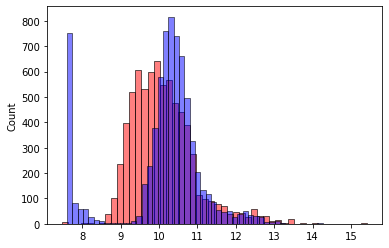

In [214]:
sns.histplot(y_pred, color = 'red', alpha =0.5, bins = 50)
sns.histplot(y_train, color = 'blue', alpha =0.5, bins = 50)

## RMSE

In [215]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [216]:
rmse(y_train, y_pred)

0.7554192603920132

## Computing RMSE on Validation data

In [217]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg','city_mpg', 'popularity']

X_train = df_train[base].fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [218]:
#preparing data like, filling missing value 
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [219]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train) #training part

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.761653099130156

## Simple feature engineering

In [220]:
2017 - df_train.year

0        9
1        5
2        1
3       26
4        0
        ..
7145     2
7146     2
7147     2
7148     3
7149     0
Name: year, Length: 7150, dtype: int64

In [221]:
def prepare_X(df):
    df = df.copy()

    df['age'] = 2017 - df.year
    features = base + ['age']

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [222]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5172055461058299

c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option i

<Axes: ylabel='Count'>

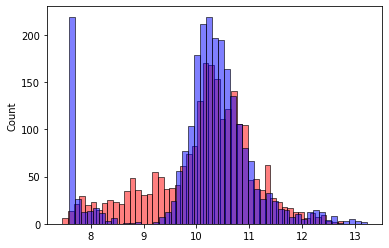

In [223]:
sns.histplot(y_pred, color = 'red', alpha =0.5, bins = 50)
sns.histplot(y_val, color = 'blue', alpha =0.5, bins = 50)

## Categorical Variables

usually string 

In [224]:
for v in [2,3, 4]:
    df_train['num_doors_%s' % v] = (df_train.number_of_doors == v).astype('int')

In [225]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2,3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)


    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [226]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.515799564150169

In [227]:
makes = list(df.make.value_counts().head().index)
makes

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

In [228]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2,3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)

    for v in makes:
        df['make_%s' % v] = (df.make == v).astype('int')
        features.append('make_%s' % v)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [229]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5076038849556795

others categories

In [230]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
num_doors_2            int32
num_doors_3            int32
num_doors_4            int32
dtype: object

In [231]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'num_doors_2', 'num_doors_3',
       'num_doors_4'],
      dtype='object')

In [232]:
categorical_variables = [
    'make', 'engine_fuel_type', 'transmission_type', 'driven_wheels',
    'market_category', 'vehicle_size', 'vehicle_style'
]

In [233]:
categories = {}

for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head().index)


In [234]:
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [235]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2,3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)

    for c, values in categories.items():
        for v in values:
            df['%s_%s' % (c, v)] = (df[c] == v).astype('int')
            features.append('%s_%s' % (c, v))

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [236]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

30.23507117183833

In [237]:
w

array([ 1.60153321e-01,  5.97007995e+00,  3.44242739e+00,  2.03169094e+00,
       -4.29920455e-04,  2.03440439e+00,  1.72759508e+03,  1.76077623e+03,
        1.74391163e+03,  5.41427513e-01,  4.07734659e+00, -5.27809286e-01,
       -6.41118293e+00, -5.33685888e+00,  1.77781114e+02,  1.48717357e+02,
        1.68263773e+02,  1.58118827e+02,  2.07147773e+02, -1.49832648e+16,
       -1.49832648e+16, -1.49832648e+16, -1.49832648e+16, -1.49832648e+16,
        8.20740574e+15,  8.20740574e+15,  8.20740574e+15,  8.20740574e+15,
       -4.36450031e+00, -6.20983238e+00, -6.30240281e+00, -1.47645611e+01,
        2.16584859e+00,  7.69712542e+01,  7.21113575e+01,  7.33879113e+01,
       -4.85492239e-02,  5.44797374e-02,  1.78241160e-01,  3.41906701e-01,
       -1.64412078e-01])

## Regularization

In [238]:
X = [
    [4, 4, 4],
    [5, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5],

]

X = np.array(X)
X

array([[4, 4, 4],
       [5, 5, 5],
       [5, 1, 1],
       [5, 4, 4],
       [7, 5, 5],
       [4, 5, 5]])

In [239]:
XTX = X.T.dot(X)

In [240]:
np.linalg.inv(XTX)

LinAlgError: Singular matrix

it happens because the data is not clean, there's noise

In [241]:
#contoh lain
X = [
    [4, 4, 4],
    [5, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5.01],

]

X = np.array(X)
X

array([[4.  , 4.  , 4.  ],
       [5.  , 5.  , 5.  ],
       [5.  , 1.  , 1.  ],
       [5.  , 4.  , 4.  ],
       [7.  , 5.  , 5.  ],
       [4.  , 5.  , 5.01]])

In [242]:
y = [1, 2, 3, 1, 2, 3]

In [243]:
XTX = X.T.dot(X)
XTX

array([[156.    , 121.    , 121.04  ],
       [121.    , 108.    , 108.05  ],
       [121.04  , 108.05  , 108.1001]])

In [244]:
XTX_inv = np.linalg.inv(XTX)

In [245]:
XTX_inv.dot(X.T).dot(y)

array([   0.60112755, -238.90627202,  238.54827343])

for feature matrix that has duplicate can solved using add small number in the diagonal of matrix


In [246]:
XTX = [
    [1, 2, 2],
    [2, 1, 1.0000001],
    [2, 1.0000001, 1]
]

XTX = np.array(XTX)

In [247]:
XTX_inv = np.linalg.inv(XTX)

In [248]:
#add small number to diagonal
XTX = XTX + 0.01 * np.eye(3)

In [249]:
np.linalg.inv(XTX)

array([[ -0.33668908,   0.33501399,   0.33501399],
       [  0.33501399,  49.91590897, -50.08509104],
       [  0.33501399, -50.08509104,  49.91590897]])

In [250]:
def train_linear_regression_reg(X, y, r =0.001):
    ones = np.ones(X.shape[0]) 
    X = np.column_stack([ones, X])

    #gamma matrix
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [251]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r = 0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.4565219901456571

the rmse (error) berkurang menggunakan regularization.

jika nilai r tinggi model akan makin jelek tapi jika r terlalu rendah juga akan menghasilkan nilai yang jelek 

## Tuning the model

will use the validation dataset to finding the best value

In [252]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1 , 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r = r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)

    print(r, w0, score)

0.0 6775859061080289.0 30.23507117183833
1e-05 6.590905413435901 0.4565170284506526
0.0001 6.29829381216216 0.45651706115512675
0.001 6.285877621486336 0.45651750874621566
0.1 6.191208692817916 0.45656927630256605
1 5.634896667769638 0.4572204317998236
10 4.283980108950864 0.4701456932100146


In [253]:
r = 0.001

#train model
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r = r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
score

0.45651750874621566

## Using the model

In [254]:
df_full_train = pd.concat([df_train, df_val]) 

In [255]:
df_full_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,num_doors_2,num_doors_3,num_doors_4
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,1.0,0.0,0.0
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,0.0,0.0,1.0
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,0.0,0.0,1.0
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,0.0,1.0,0.0
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,0.0,0.0,1.0


In [256]:
df_full_train = df_full_train.reset_index(drop= True)

In [257]:
df_full_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,num_doors_2,num_doors_3,num_doors_4
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,1.0,0.0,0.0
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,0.0,0.0,1.0
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,0.0,0.0,1.0
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,0.0,1.0,0.0
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870,NaN,NaN,NaN
9528,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238,NaN,NaN,NaN
9529,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624,NaN,NaN,NaN
9530,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436,NaN,NaN,NaN


In [258]:
#to get feature matrix
X_full_train = prepare_X(df_full_train)

In [259]:
X_full_train

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]])

In [260]:
y_full_train = np.concatenate([y_train, y_val])

In [261]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r = r)

In [262]:
w

array([ 1.52506335e-03,  1.18188698e-01, -6.66105599e-03, -5.33413967e-03,
       -4.87603201e-05, -9.69091844e-02, -7.92621540e-01, -8.90862746e-01,
       -6.35101468e-01, -4.14339216e-02,  1.75560740e-01, -5.78067168e-04,
       -1.00563873e-01, -9.27549664e-02, -4.66859107e-01,  7.98659760e-02,
       -3.16047655e-01, -5.51981627e-01, -7.89525558e-02,  1.09459009e+00,
        9.19282555e-01,  1.14885995e+00,  2.65199591e+00,  5.09219143e-01,
        1.62947352e+00,  1.53017757e+00,  1.61735629e+00,  1.54535568e+00,
       -9.70559783e-02,  3.73062088e-02, -5.81767478e-02, -2.35940849e-02,
       -1.19357153e-02,  2.18895260e+00,  2.07458270e+00,  2.05916686e+00,
       -5.00802769e-02,  5.62184639e-02,  1.84794024e-01,  3.32646151e-01,
       -1.58817038e-01])

In [263]:
#prepare test data set

X_test = prepare_X(df_test)
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
score
score = rmse(y_test, y_pred)
score

0.45177493073856806

In [264]:
#test model

car = df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [265]:
#make the data into dataframe

df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031


In [266]:
X_small = prepare_X(df_small)

In [269]:
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0] #because only need one prediction
y_pred

10.462651719378059

In [270]:
#because the result is the logarithm so we need to do exponent to get the price

np.expm1(y_pred)

34983.19683051872

and so thats the predictions of price

In [271]:
#the actual price

np.expm1(y_test[20])

35000.00000000001